# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [173]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [174]:
X_ = pd.read_csv(r"C:\Users\alext\Documents\EBAC\Curso Cientista de Dados\Módulo 17\mod17tarefa1\X_train1.csv")
X_test = pd.read_csv(r"C:\Users\alext\Documents\EBAC\Curso Cientista de Dados\Módulo 17\mod17tarefa1\X_test1.csv")
y_ = pd.read_csv(r"C:\Users\alext\Documents\EBAC\Curso Cientista de Dados\Módulo 17\mod17tarefa1\y_train.txt", header = None)
y_test = pd.read_csv(r"C:\Users\alext\Documents\EBAC\Curso Cientista de Dados\Módulo 17\mod17tarefa1\y_test.txt", header = None)

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [175]:
X_train, X_valid, y_train, y_valid = train_test_split(X_, y_, test_size = .25, random_state = 666)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [176]:
#Criando uma árvore com profundidade máxima = 4:
clf = DecisionTreeClassifier(max_depth = 4, random_state = 555)
#Fitando a árvore:
clf.fit(X_train, y_train)
#Selecionando as 3 variáveis mais importantes do modelo:
f_i = pd.DataFrame(clf.feature_importances_, index = X_train.columns)
f_i = f_i[f_i!= 0].sort_values([0], ascending = False)
f_i[:3]

,0
53 tGravityAcc-min()-X,0.285072
272 fBodyAcc-mad()-X,0.253786
42 tGravityAcc-mean()-Y,0.173771


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [177]:
%%time
X_train = X_train[['53 tGravityAcc-min()-X', '272 fBodyAcc-mad()-X', '42 tGravityAcc-mean()-Y']]
X_valid = X_valid[['53 tGravityAcc-min()-X', '272 fBodyAcc-mad()-X', '42 tGravityAcc-mean()-Y']]

path = DecisionTreeClassifier(random_state=666).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

CPU times: total: 0 ns
Wall time: 17.5 ms


In [178]:
%%time
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=555, ccp_alpha=ccp_alpha).fit(X_train, y_train)
    clfs.append(clf)

CPU times: total: 3.61 s
Wall time: 3.65 s


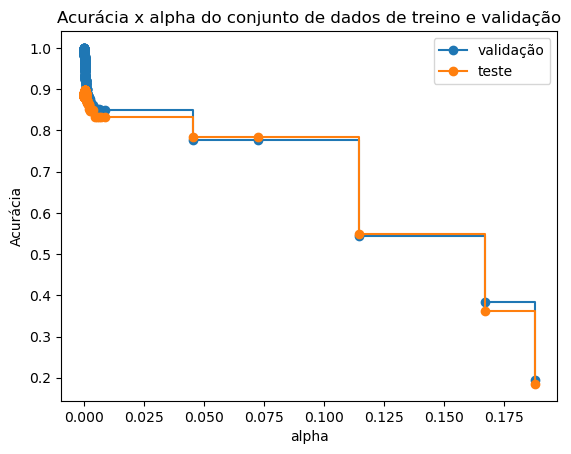

CPU times: total: 1.08 s
Wall time: 1.13 s


In [179]:
%%time
train_scores = [clf.score(X_train, y_train) for clf in clfs]
valid_scores = [clf.score(X_valid, y_valid) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e validação")
ax.plot(ccp_alphas, train_scores, marker='o', label="validação",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [180]:
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de validação: {valid_scores[ind_melhor_arvore]*100:.2f}%')

melhor_arvore

Acurácia da melhor árvore na base de validação: 89.88%


DecisionTreeClassifier(ccp_alpha=0.00038084874863982584, random_state=555)

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

Acurácia da melhor árvore na base de testes: 71.77%


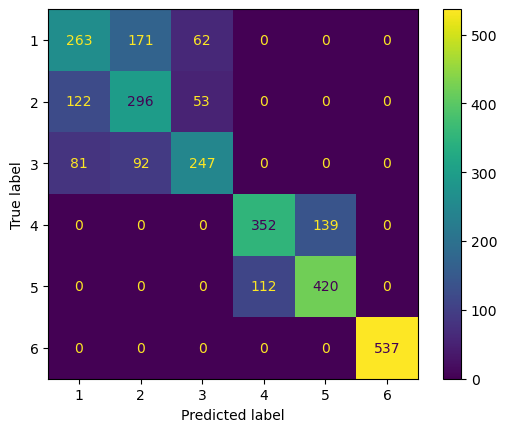

In [181]:
X_test = X_test[['53 tGravityAcc-min()-X', '272 fBodyAcc-mad()-X', '42 tGravityAcc-mean()-Y']]

acuracia_teste = melhor_arvore.score(X_test, y_test)

print(f'Acurácia da melhor árvore na base de testes: {acuracia_teste*100:.2f}%')
ConfusionMatrixDisplay.from_estimator(melhor_arvore, X_test, y_test);